# Первичный анализ данных c Pandas

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считываем данные

In [2]:
dat = pd.read_csv('weights_heights.csv', index_col = 'Index')

Смотрим на первые 5 записей 

In [3]:
dat.head

<bound method NDFrame.head of          Height     Weight
Index                     
1      65.78331  112.99250
2      71.51521  136.48730
3      69.39874  153.02690
4      68.21660  142.33540
5      67.78781  144.29710
6      68.69784  123.30240
7      69.80204  141.49470
8      70.01472  136.46230
9      67.90265  112.37230
10     66.78236  120.66720
11     66.48769  127.45160
12     67.62333  114.14300
13     68.30248  125.61070
14     67.11656  122.46180
15     68.27967  116.08660
16     71.09160  139.99750
17     66.46100  129.50230
18     68.64927  142.97330
19     71.23033  137.90250
20     67.13118  124.04490
21     67.83379  141.28070
22     68.87881  143.53920
23     63.48115   97.90191
24     68.42187  129.50270
25     67.62804  141.85010
26     67.20864  129.72440
27     70.84235  142.42350
28     67.49434  131.55020
29     66.53401  108.33240
30     65.44098  113.89220
...         ...        ...
24971  65.37753  126.61020
24972  67.49720  122.98440
24973  68.70055  123.2849

Строим гистограмму распределения

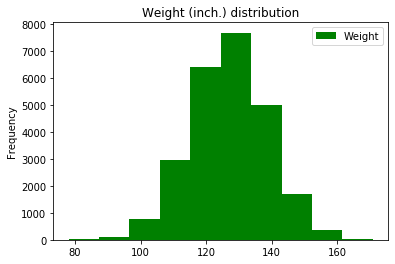

In [4]:
dat.plot(y='Weight', kind='hist', color='green',  title='Weight (inch.) distribution')

Добавляем третий признак

In [5]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [6]:
dat['BMI'] = dat.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Изобразим попарные зависимости признаков

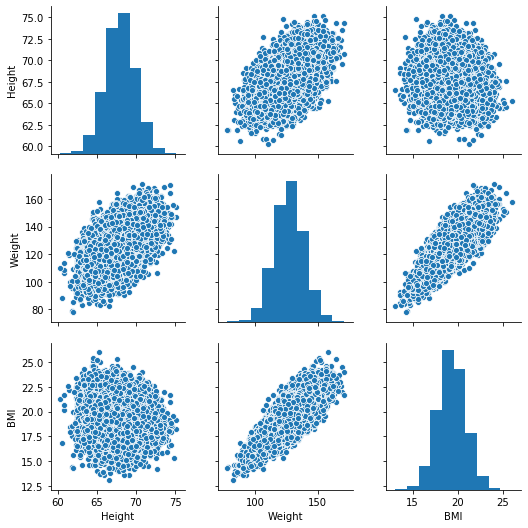

In [7]:
sns.pairplot(dat)

Создаем ещё новый признак: весовая категория и строим boxplot

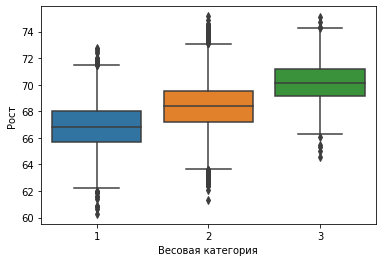

In [8]:
def weight_category(weight):
        if weight < 120: return 1
        elif weight >= 150: return 3
        else: return 2
dat['weight_cat'] = dat['Weight'].apply(weight_category)
ax = sns.boxplot(x='weight_cat', y='Height', data=dat)
ax.set(xlabel='Весовая категория', ylabel='Рост') 
plt.show()

Строим scatter plot зависимости роста от веса

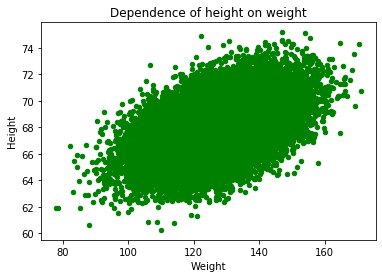

In [9]:
dat.plot(y='Height', x = 'Weight', kind='scatter', color='green',  title='Dependence of height on weight')

# Минимизация квадратичной ошибки

Напишем функцию, вычисляющую ошибку

In [10]:
def error(w0,w1):
    sum = 0
    for i in range (1, dat.shape[0]):
        sum += (dat['Height'][i] - (w0 + w1 * dat['Weight'][i])) ** 2
    return sum

Добавим к предыдущему графику две прямые с заданными значениями параметров

In [11]:
w0_1 = 60
w1_1 = 0.05
w0_2 = 50
w1_2 = 0.16
def func(w0,w1,x):
    return w0+w1*x

[ 60.   60.1  60.2 ... 179.7 179.8 179.9]


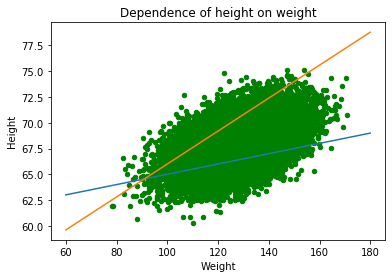

In [12]:
x_ = np.arange(start=60, stop=180, step=0.1)
dat.plot(y='Height', x = 'Weight', kind='scatter', color='green',  title='Dependence of height on weight')
y1 = func(w0_1,w1_1,x_)
y2 = func(w0_2,w1_2,x_)
plt.plot(x_, y1)
plt.plot(x_, y2)
print(x_)

Построим график зависимости функции ошибки от w1 при заданном w0

Text(0.5, 0, 'w1')

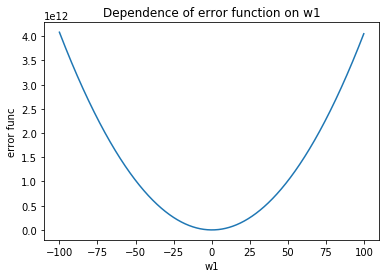

In [13]:
x = np.arange(start=-100, stop=100, step=0.1)
w0_const = 50
y = error(w0_const,x)
plt.plot(x, y)
plt.title('Dependence of error function on w1')
plt.ylabel('error func')
plt.xlabel('w1')

Найдем оптимальное значение w1 при заданном значении w0 и построим прямую

In [14]:
def func_(w1):
    y = error(w0_const, w1)
    return y

In [15]:
w1_opt = minimize_scalar(func_, bounds=(-5, 5), method='bounded')
w1_opt

     fun: 79510.63244004798
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.14109165115062905

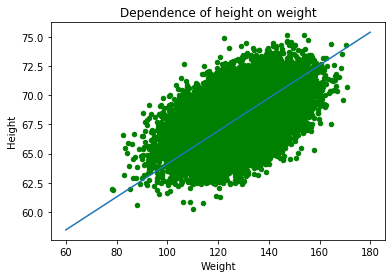

In [16]:
dat.plot(y='Height', x = 'Weight', kind='scatter', color='green',  title='Dependence of height on weight')
y3 = func(w0_const, w1_opt.x, x_)
plt.plot(x_, y3)

Построим 3D-график зависимости функции ошибки от w0 и w1

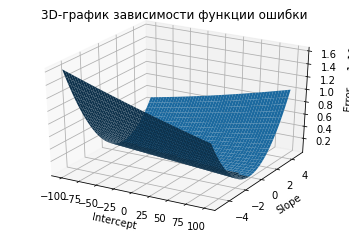

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-100, 100, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(X,Y)
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
ax.set_title(u'3D-график зависимости функции ошибки')

plt.show()

Найдем минимум функции ошибки

In [18]:
from scipy.optimize import minimize
x0 = np.array([0,0])
from scipy.optimize import Bounds
res = minimize(error_, x0, method = 'L-BFGS-B', bounds = ([-100, 100], [-5, 5]))

NameError: name 'error_' is not defined

In [ ]:
res

In [ ]:
dat.plot(y='Height', x = 'Weight', kind='scatter', color='green',  title='Dependence of height on weight')
y4 = func(res.x[0], res.x[1], x_)
plt.plot(x_, y3)